In [184]:
# Danesh Abdollahi _ 9723053 _ HW3 _ Dr.Seyyedin _ Fall 2021

In [185]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [186]:
Dataset =  pd.read_csv('/content/iris.data', sep="," , header=None)
Class0 = "Iris-setosa"
Class1 = "Iris-versicolor"
Class2 = "Iris-virginica"

X = Dataset.iloc[:,0:4] # Inputs
Y = Dataset.iloc[:,-1]  # Outputs

X_Class0 = X.iloc[0:50,:] 
Y_Class0 = Y.iloc[0:50]

X_Class1 = X.iloc[50:100,:]
Y_Class1 = Y.iloc[50:100]

X_Class2 = X.iloc[100:150,:]
Y_Class2 = Y.iloc[100:150]

Accuracy On Train Dataset  = 99.04761904761905 Percetn
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         32.38095238  0.95238095]
 [ 0.          0.         33.33333333]]




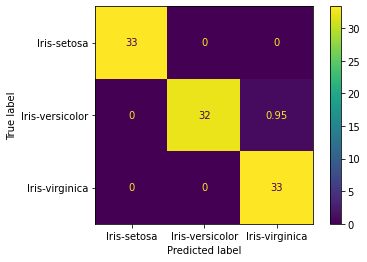



Accuracy On Train Dataset  = 97.77777777777777 Percetn
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         31.11111111  2.22222222]
 [ 0.          0.         33.33333333]]




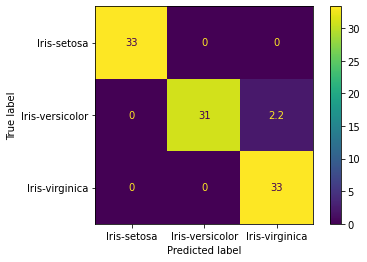



Number Of Support Vectors of 'Iris-setosa' Class = 2
Number Of Support Vectors of 'Iris-versicolor' Class = 9
Number Of Support Vectors of 'Iris-virginica' Class = 9


In [187]:
# Part A
# Splitting Dataset To Train Dataset & Test Dataset
X_Train0 , X_Test0 , Y_Train0 , Y_Test0 = train_test_split( X_Class0 , Y_Class0 , test_size= 0.3 , shuffle=True , random_state = 25 )
X_Train1 , X_Test1 , Y_Train1 , Y_Test1 = train_test_split( X_Class1 , Y_Class1 , test_size= 0.3 , shuffle=True , random_state = 25 )
X_Train2 , X_Test2 , Y_Train2 , Y_Test2 = train_test_split( X_Class2 , Y_Class2 , test_size= 0.3 , shuffle=True , random_state = 25 )

X_Train = pd.concat([X_Train0, X_Train1 , X_Train2], axis=0)
Y_Train = pd.concat([Y_Train0, Y_Train1 , Y_Train2], axis=0)

X_Test = pd.concat([X_Test0, X_Test1 , X_Test2], axis=0)
Y_Test = pd.concat([Y_Test0, Y_Test1 , Y_Test2], axis=0)
#-------------------------------------------------------------------------------------#
# Training Stage
Classifier = SVC(kernel='linear')
Classifier.fit(X_Train, Y_Train)
#-------------------------------------------------------------------------------------#
# Prediction Stage With Trained Classifier
Train_Prediction = Classifier.predict(X_Train)
Test_Prediction  = Classifier.predict(X_Test)
#-------------------------------------------------------------------------------------#
# Calculating Accuracy On Train Dataset
Acc_On_Train = metrics.accuracy_score(Y_Train, Train_Prediction)
print(f"Accuracy On Train Dataset  = {Acc_On_Train*100} Percetn")
# Calculation & Plotting Confusion Matrix
CM = confusion_matrix (Y_Train.values , Train_Prediction)
CM = (CM*100) / Train_Prediction.shape[0]
print('Confusion Matrix In Percent:\n', CM) 
disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")

# Calculating Accuracy On Test Dataset
Acc_On_Test  = metrics.accuracy_score(Y_Test, Test_Prediction)
print(f"Accuracy On Train Dataset  = {Acc_On_Test*100} Percetn")
# Calculation & Plotting Confusion Matrix
CM = confusion_matrix (Y_Test.values , Test_Prediction)
CM = (CM*100) / Test_Prediction.shape[0]
print('Confusion Matrix In Percent:\n', CM) 
disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")
# Support Vectors Number
SV_Num_Class0 , SV_Num_Class1 , SV_Num_Class2 = Classifier.n_support_
print(f"Number Of Support Vectors of '{Class0}' Class = {SV_Num_Class0}")
print(f"Number Of Support Vectors of '{Class1}' Class = {SV_Num_Class1}")
print(f"Number Of Support Vectors of '{Class2}' Class = {SV_Num_Class2}")

		   Best C = 2




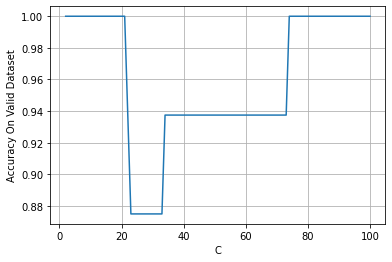



Accuracy On Train Dataset  = 98.09523809523809 Percetn
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         31.42857143  1.9047619 ]
 [ 0.          0.         33.33333333]]




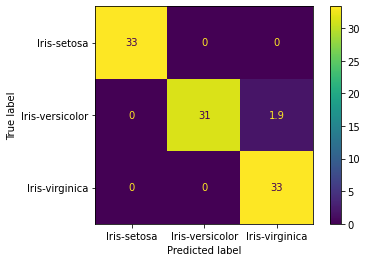



Accuracy On Test Dataset  = 97.77777777777777 Percent
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         31.11111111  2.22222222]
 [ 0.          0.         33.33333333]]




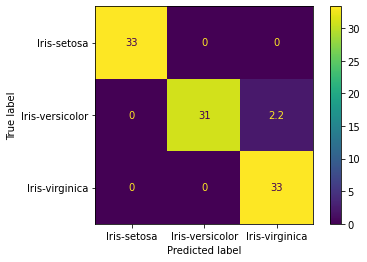



Number Of Support Vectors of 'Iris-setosa' Class = 2
Number Of Support Vectors of 'Iris-versicolor' Class = 8
Number Of Support Vectors of 'Iris-virginica' Class = 7


In [188]:
# Part B
# Generate Validation Dataset From Train Dataset ( 15% Of Train Dataset )
X_Train_New , X_Valid, Y_Train_New, Y_Valid = train_test_split(X_Train, Y_Train, test_size= 0.15 , shuffle=True , random_state = 13)
#-------------------------------------------------------------------------------------#
C = []
Acc_On_Valid = []

for i in range(99):
  # Training Stage
  Temp_Classifier = SVC(C=i+2 , kernel='linear')
  Temp_Classifier.fit(X_Train_New , Y_Train_New)
  # Calculating Accuracy On Validation 
  Valid_Prediction  = Temp_Classifier.predict(X_Valid)
  C.append(i+2)
  Acc_On_Valid.append( metrics.accuracy_score(Y_Valid, Valid_Prediction) )

# Calculating Best C & Plotting Accuracy On Valid Dataset Diagram
Best_C_index = Acc_On_Valid.index(max(Acc_On_Valid))
Best_C = C[Best_C_index]
print(f"\t\t   Best C = {Best_C}")
print("\n")
plt.plot(C,Acc_On_Valid)
plt.xlabel("C")
plt.ylabel("Accuracy On Valid Dataset")
plt.grid('on')
plt.show()
print("\n")
#-------------------------------------------------------------------------------------#
# Training Stage With Best C Value
Classifier = SVC(C = Best_C , kernel ='linear')
Classifier.fit(X_Train, Y_Train)
#-------------------------------------------------------------------------------------#
# Prediction Stage With Trained Classifier
Train_Prediction = Classifier.predict(X_Train)
Test_Prediction  = Classifier.predict(X_Test)
#-------------------------------------------------------------------------------------#
# Calculating Accuracy On Train Dataset
Acc_On_Train = metrics.accuracy_score(Y_Train, Train_Prediction)
print(f"Accuracy On Train Dataset  = {Acc_On_Train*100} Percetn")
# Calculation & Plotting Confusion Matrix
CM = confusion_matrix (Y_Train.values , Train_Prediction)
CM = (CM*100) / Train_Prediction.shape[0]
print('Confusion Matrix In Percent:\n', CM) 
disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")

# Calculating Accuracy On Test Dataset
Acc_On_Test  = metrics.accuracy_score(Y_Test, Test_Prediction)
print(f"Accuracy On Test Dataset  = {Acc_On_Test*100} Percent")
# Calculation & Plotting Confusion Matrix
CM = confusion_matrix (Y_Test.values , Test_Prediction)
CM = (CM*100) / Test_Prediction.shape[0]
print('Confusion Matrix In Percent:\n', CM) 
disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")
# Support Vectors Number
SV_Num_Class0 , SV_Num_Class1 , SV_Num_Class2 = Classifier.n_support_
print(f"Number Of Support Vectors of '{Class0}' Class = {SV_Num_Class0}")
print(f"Number Of Support Vectors of '{Class1}' Class = {SV_Num_Class1}")
print(f"Number Of Support Vectors of '{Class2}' Class = {SV_Num_Class2}")


The Best Classifier is The Classifier With Poly Kernel With Accuracy 100.0 Percent On Valid Dataset


Accuracy On Train Dataset  = 98.09523809523809 Percetn
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         31.42857143  1.9047619 ]
 [ 0.          0.         33.33333333]]




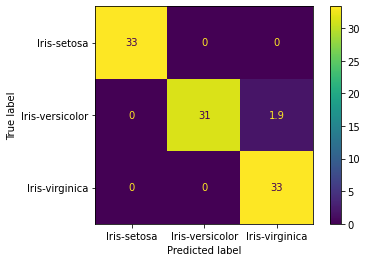



Accuracy On Test Dataset  = 97.77777777777777 Percent
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         31.11111111  2.22222222]
 [ 0.          0.         33.33333333]]




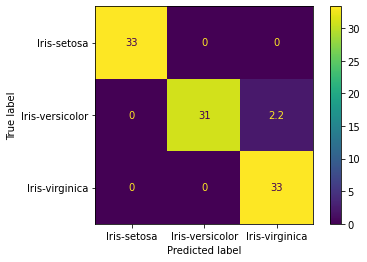



Number Of Support Vectors of 'Iris-setosa' Class = 3
Number Of Support Vectors of 'Iris-versicolor' Class = 7
Number Of Support Vectors of 'Iris-virginica' Class = 6


In [189]:
# Part C
# Training Stage
RBF_Classifier = SVC(kernel='rbf') 
RBF_Classifier.fit(X_Train_New, Y_Train_New)

Poly_Classifier = SVC(kernel='poly') 
Poly_Classifier.fit(X_Train_New, Y_Train_New)

# Calculating Classifier's Accuracy On Validation
RBF_Valid_Prediction = RBF_Classifier.predict(X_Valid)
Poly_Valid_Prediction = Poly_Classifier.predict(X_Valid)
RBF_Classifier_Acc = metrics.accuracy_score(Y_Valid, RBF_Valid_Prediction)
Poly_Classifier_Acc = metrics.accuracy_score(Y_Valid, Poly_Valid_Prediction)

if RBF_Classifier_Acc >= Poly_Classifier_Acc :
  Kernel = 'rbf'
  print(f"The Best Classifier is The Classifier With RBF Kernel With Accuracy {RBF_Classifier_Acc*100} Percent On Valid Dataset")
else :
  Kernel = 'poly'
  print(f"The Best Classifier is The Classifier With Poly Kernel With Accuracy {Poly_Classifier_Acc*100} Percent On Valid Dataset")

# Training Stage
Classifier = SVC(kernel = Kernel)
Classifier.fit(X_Train, Y_Train)
#-------------------------------------------------------------------------------------#
# Prediction Stage With Trained Classifier
Train_Prediction = Classifier.predict(X_Train)
Test_Prediction  = Classifier.predict(X_Test)

#-------------------------------------------------------------------------------------#
# Calculating Accuracy On Train Dataset
Acc_On_Train = metrics.accuracy_score(Y_Train, Train_Prediction)
print("\n")
print(f"Accuracy On Train Dataset  = {Acc_On_Train*100} Percetn")
# Calculation & Plotting Confusion Matrix
CM = confusion_matrix (Y_Train.values , Train_Prediction)
CM = (CM*100) / Train_Prediction.shape[0]
print('Confusion Matrix In Percent:\n', CM) 
disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")

# Calculating Accuracy On Test Dataset
Acc_On_Test  = metrics.accuracy_score(Y_Test, Test_Prediction)
print(f"Accuracy On Test Dataset  = {Acc_On_Test*100} Percent")
# Calculation & Plotting Confusion Matrix
CM = confusion_matrix (Y_Test.values , Test_Prediction)
CM = (CM*100) / Test_Prediction.shape[0]
print('Confusion Matrix In Percent:\n', CM) 
disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")
# Support Vectors Number
SV_Num_Class0 , SV_Num_Class1 , SV_Num_Class2 = Classifier.n_support_
print(f"Number Of Support Vectors of '{Class0}' Class = {SV_Num_Class0}")
print(f"Number Of Support Vectors of '{Class1}' Class = {SV_Num_Class1}")
print(f"Number Of Support Vectors of '{Class2}' Class = {SV_Num_Class2}")






		   Best C = 2




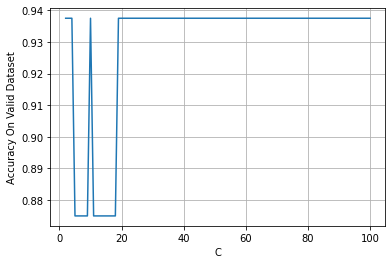



Accuracy On Train Dataset  = 99.04761904761905 Percetn
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         32.38095238  0.95238095]
 [ 0.          0.         33.33333333]]




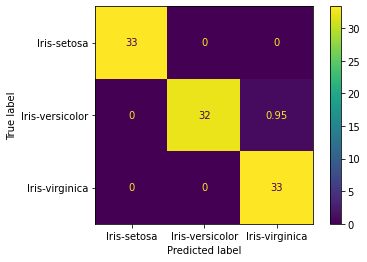



Accuracy On Test Dataset  = 97.77777777777777 Percent
Confusion Matrix In Percent:
 [[33.33333333  0.          0.        ]
 [ 0.         31.11111111  2.22222222]
 [ 0.          0.         33.33333333]]




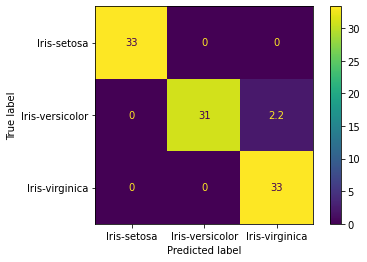



Number Of Support Vectors of 'Iris-setosa' Class = 3
Number Of Support Vectors of 'Iris-versicolor' Class = 5
Number Of Support Vectors of 'Iris-virginica' Class = 5


In [190]:
# Part D
C = []
Acc_On_Valid = []

for i in range(99):
  # Training Stage
  Temp_Classifier = SVC(C=i+2 , kernel= Kernel)
  Temp_Classifier.fit(X_Train_New , Y_Train_New)
  # Calculating Accuracy On Validation 
  Valid_Prediction  = Temp_Classifier.predict(X_Valid)
  C.append(i+2)
  Acc_On_Valid.append( metrics.accuracy_score(Y_Valid, Valid_Prediction) )

# Calculating Best C & Plotting Accuracy On Valid Dataset Diagram
Best_C_index = Acc_On_Valid.index(max(Acc_On_Valid))
Best_C = C[Best_C_index]
print(f"\t\t   Best C = {Best_C}")
print("\n")
plt.plot(C,Acc_On_Valid)
plt.xlabel("C")
plt.ylabel("Accuracy On Valid Dataset")
plt.grid('on')
plt.show()
print("\n")
#-------------------------------------------------------------------------------------#
# Training Stage With Best C Value
Classifier = SVC(C = Best_C , kernel = Kernel)
Classifier.fit(X_Train, Y_Train)
#-------------------------------------------------------------------------------------#
# Prediction Stage With Trained Classifier
Train_Prediction = Classifier.predict(X_Train)
Test_Prediction  = Classifier.predict(X_Test)
#-------------------------------------------------------------------------------------#
# Calculating Accuracy On Train Dataset
Acc_On_Train = metrics.accuracy_score(Y_Train, Train_Prediction)
print(f"Accuracy On Train Dataset  = {Acc_On_Train*100} Percetn")
# Calculation & Plotting Confusion Matrix
CM = confusion_matrix (Y_Train.values , Train_Prediction)
CM = (CM*100) / Train_Prediction.shape[0]
print('Confusion Matrix In Percent:\n', CM) 
disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")

# Calculating Accuracy On Test Dataset
Acc_On_Test  = metrics.accuracy_score(Y_Test, Test_Prediction)
print(f"Accuracy On Test Dataset  = {Acc_On_Test*100} Percent")
# Calculation & Plotting Confusion Matrix
CM = confusion_matrix (Y_Test.values , Test_Prediction)
CM = (CM*100) / Test_Prediction.shape[0]
print('Confusion Matrix In Percent:\n', CM) 
disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[Class0 , Class1 , Class2])
disp.plot()
print("\n")
plt.show()
print("\n")
# Support Vectors Number
SV_Num_Class0 , SV_Num_Class1 , SV_Num_Class2 = Classifier.n_support_
print(f"Number Of Support Vectors of '{Class0}' Class = {SV_Num_Class0}")
print(f"Number Of Support Vectors of '{Class1}' Class = {SV_Num_Class1}")
print(f"Number Of Support Vectors of '{Class2}' Class = {SV_Num_Class2}")
